In [1]:
# Loading the Data

In [95]:
import json
import os
import matplotlib.pyplot as plt
import pytz
import numpy as np
import json
import numpy as np
import statsmodels.api as sm
import datetime, time
import pytz
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
# extracting features
def extracting_5_agg():
    
    posting_time = []
    num_retweets = []
    num_followers = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
    for hashtag in hashtags:
        print ("Reading from file ", hashtag)
        file = open('./data/'+hashtag, encoding = 'utf8')
        for line in file:
            data = json.loads(line)
            posting_time.append(data['citation_date'])
            num_retweets.append(data['metrics']['citations']['total'])
            num_followers.append(data['author']['followers'])
        file.close()
        
    hours = int((max(posting_time)-min(posting_time))/3600)+1
    tmp = np.zeros([hours, 5])
    start_time = min(posting_time)
    start_hour = (datetime.datetime.fromtimestamp(start_time, pst_tz)).hour

    for i in range(hours):
        tmp[i,4] = (start_hour+i)%24
    for i in range(len(posting_time)):
        tmp[int((posting_time[i]-start_time)/3600), 0] += 1
        tmp[int((posting_time[i]-start_time)/3600), 1] += num_retweets[i]
        tmp[int((posting_time[i]-start_time)/3600), 2] += num_followers[i]
        if tmp[int((posting_time[i]-start_time)/3600), 3] < num_followers[i]:
            tmp[int((posting_time[i]-start_time)/3600), 3] = num_followers[i]
    return tmp

In [4]:
# # extracting features
# def extracting_3(hashtag):
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     file = open('./data/'+hashtag, encoding = 'utf8')
    
#     posting_time_1 = []
#     num_retweets_1 = []
#     num_followers_1 = []
    
#     posting_time_2 = []
#     num_retweets_2 = []
#     num_followers_2 = []
    
#     posting_time_3 = []
#     num_retweets_3 = []
#     num_followers_3 = []
    
#     for line in file:
#         data = json.loads(line)
#         time = data['citation_date']
#         if (time < time1):
#             posting_time_1.append(data['citation_date'])
#             num_retweets_1.append(data['metrics']['citations']['total'])
#             num_followers_1.append(data['author']['followers'])
#         elif (time <= time2):
#             posting_time_2.append(data['citation_date'])
#             num_retweets_2.append(data['metrics']['citations']['total'])
#             num_followers_2.append(data['author']['followers'])
#         else:
#             posting_time_3.append(data['citation_date'])
#             num_retweets_3.append(data['metrics']['citations']['total'])
#             num_followers_3.append(data['author']['followers'])
        
#     file.close()
    
#     hours1 = int((max(posting_time_1)-min(posting_time_1))/3600)+1
#     tmp1 = np.zeros([hours1, 5])
#     start_time_1 = min(posting_time_1)
#     start_hour_1 = (datetime.datetime.fromtimestamp(start_time_1, pst_tz)).hour
    
#     fivemins = int((max(posting_time_2)-min(posting_time_2))/300)+1
#     tmp2 = np.zeros([fivemins, 5])
#     start_time_2 = min(posting_time_2)
#     start_5min_2 = int(((datetime.datetime.fromtimestamp(start_time_2, pst_tz)).minute)/5)
    
#     hours3 = int((max(posting_time_3)-min(posting_time_3))/3600)+1
#     tmp3 = np.zeros([hours3, 5])
#     start_time_3 = min(posting_time_3)
#     start_hour_3 = (datetime.datetime.fromtimestamp(start_time_3, pst_tz)).hour

#     for i in range(hours1):
#         tmp1[i,4] = (start_hour_1+i)%24
#     for i in range(len(posting_time_1)):
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 0] += 1
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 1] += num_retweets_1[i]
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 2] += num_followers_1[i]
#         if tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] < num_followers_1[i]:
#             tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] = num_followers_1[i]
            
#     for i in range(hours3):
#         tmp3[i,4] = (start_hour_3+i)%24
#     for i in range(len(posting_time_3)):
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 0] += 1
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 1] += num_retweets_3[i]
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 2] += num_followers_3[i]
#         if tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] < num_followers_3[i]:
#             tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] = num_followers_3[i]
    
#     for i in range(fivemins):
#         tmp2[i,4] = (start_5min_2+i)%12
#     for i in range(len(posting_time_2)):
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 0] += 1
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 1] += num_retweets_2[i]
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 2] += num_followers_2[i]
#         if tmp2[int((posting_time_2[i]-start_time_2)/300), 3] < num_followers_2[i]:
#             tmp2[int((posting_time_2[i]-start_time_2)/300), 3] = num_followers_2[i]
            
            
#     return (tmp1, tmp2, tmp3)

In [4]:
# extracting features for aggregate

def extracting_5_3_agg():
    pst_tz = pytz.timezone('America/Los_Angeles')
    
    posting_time_1 = []
    num_retweets_1 = []
    num_followers_1 = []
    
    posting_time_2 = []
    
    num_retweets_2 = []
    num_followers_2 = []
    
    posting_time_3 = []
    num_retweets_3 = []
    num_followers_3 = []
    
    
    pst_tz = pytz.timezone('America/Los_Angeles')
    time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
    time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
    hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
    for hashtag in hashtags:
        print ("Opening: ", hashtag)
        file = open('./data/'+hashtag, encoding = 'utf8')
        for line in file:
            data = json.loads(line)
            time = data['citation_date']
            if (time < time1):
                posting_time_1.append(data['citation_date'])
                num_retweets_1.append(data['metrics']['citations']['total'])
                num_followers_1.append(data['author']['followers'])
            elif (time <= time2):
                posting_time_2.append(data['citation_date'])
                num_retweets_2.append(data['metrics']['citations']['total'])
                num_followers_2.append(data['author']['followers'])
            else:
                posting_time_3.append(data['citation_date'])
                num_retweets_3.append(data['metrics']['citations']['total'])
                num_followers_3.append(data['author']['followers'])

        file.close()
    
    hours1 = int((max(posting_time_1)-min(posting_time_1))/3600)+1
    tmp1 = np.zeros([hours1, 5])
    start_time_1 = min(posting_time_1)
    start_hour_1 = (datetime.datetime.fromtimestamp(start_time_1, pst_tz)).hour
    
    fivemins = int((max(posting_time_2)-min(posting_time_2))/300)+1
    tmp2 = np.zeros([fivemins, 5])
    start_time_2 = min(posting_time_2)
    start_5min_2 = int(((datetime.datetime.fromtimestamp(start_time_2, pst_tz)).minute)/5)
    
    hours3 = int((max(posting_time_3)-min(posting_time_3))/3600)+1
    tmp3 = np.zeros([hours3, 5])
    start_time_3 = min(posting_time_3)
    start_hour_3 = (datetime.datetime.fromtimestamp(start_time_3, pst_tz)).hour

    for i in range(hours1):
        tmp1[i,4] = (start_hour_1+i)%24
    for i in range(len(posting_time_1)):
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 0] += 1
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 1] += num_retweets_1[i]
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 2] += num_followers_1[i]
        if tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] < num_followers_1[i]:
            tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] = num_followers_1[i]
            
    for i in range(hours3):
        tmp3[i,4] = (start_hour_3+i)%24
    for i in range(len(posting_time_3)):
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 0] += 1
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 1] += num_retweets_3[i]
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 2] += num_followers_3[i]
        if tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] < num_followers_3[i]:
            tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] = num_followers_3[i]
    
    for i in range(fivemins):
        tmp2[i,4] = (start_5min_2+i)%12
    for i in range(len(posting_time_2)):
        tmp2[int((posting_time_2[i]-start_time_2)/300), 0] += 1
        tmp2[int((posting_time_2[i]-start_time_2)/300), 1] += num_retweets_2[i]
        tmp2[int((posting_time_2[i]-start_time_2)/300), 2] += num_followers_2[i]
        if tmp2[int((posting_time_2[i]-start_time_2)/300), 3] < num_followers_2[i]:
            tmp2[int((posting_time_2[i]-start_time_2)/300), 3] = num_followers_2[i]
            
            
    return (tmp1, tmp2, tmp3)

In [6]:
# def extract_features_agg(): 
#     posting_time = []
    
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ("Opening: ", hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         for line in file:
#             data = json.loads(line)
#             posting_time.append(data['citation_date'])
#         file.close()
    
#    total_hours = int((max(posting_time)-min(posting_time))/3600)+1
#     #total_hours = (end_time - start_time) / 3600 + 1
#     start_time = min(posting_time)
#     end_time= max(posting_time)
    
#     # extract five basic features
#     feat_5 = extracting_agg()
    
#     ori_author_followers = [0 for i in range(total_hours)] # total number of followers of the original author
#     favorited_num = [0 for i in range(total_hours)] # total number of times of favorited, so many zeros
#     impressions_num = [0 for i in range(total_hours)]
#     avg_ranking_score = [0 for i in range(total_hours)]
#     user_mentions = [0 for i in range(total_hours)]
#     url_count = [0 for i in range(total_hours)]
#     unique_author_set = [set() for i in range(total_hours)] # save unique author 
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ('Reading from:' , hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         # extract other features
#         for line in file:
#             tweet = json.loads(line)
#             tweet_time = tweet['citation_date']
#             hour = int((tweet_time - start_time) / 3600)
#             ori_author_followers[hour] += tweet['original_author']['followers']
#             favorited_num[hour] += tweet['tweet']['favorite_count']

#             user_mentions[hour] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count[hour] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set[hour].add(tweet['author']['nick'])
#             impressions_num[hour] += tweet['metrics']['impressions']
#             avg_ranking_score[hour] += tweet['metrics']['ranking_score'] # need to do average later
#         file.close() 
    
#     total_tweets = feat_5[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score[i] = avg_ranking_score[i] / total_tweets[i]
    
#     unique_author_count =  [len(val) for val in unique_author_set]  # number of unique authors
#     feat_extra =np.array([ori_author_followers, favorited_num, \
#                   user_mentions, url_count, unique_author_count,\
#                   impressions_num,avg_ranking_score]).T

    
#     print(feat_extra.shape)
#     feat_all = np.hstack((feat_5 , feat_extra))
#     print(feat_all[0,:])
#     return feat_all

In [7]:
# def extract_features_3(hashtag): 
#     posting_time = []
#     file = open('./data/'+hashtag, encoding = 'utf8')
    
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
#     time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
#     period1_raw = []
#     period2_raw = []
#     period3_raw = []
    
#     for line in file:
#         data = json.loads(line)
#         time = data['citation_date']
#         if (time < time1):
#             period1_raw.append(time)
#         elif (time <= time2):
#             period2_raw.append(time)
#         else:
#             period3_raw.append(time)
    
#     total_hours_1 = int((max(period1_raw)-min(period1_raw))/3600)+1
#     start_time_1 = min(period1_raw)
#     end_time_1 = max(period1_raw)
    
#     total_5min_2 = int((max(period2_raw)-min(period2_raw))/300)+1
#     start_time_2 = min(period2_raw)
#     end_time_2 = max(period2_raw)
    
#     total_hours_3 = int((max(period3_raw)-min(period3_raw))/3600)+1
#     start_time_3 = min(period3_raw)
#     end_time_3 = max(period3_raw)
    
#     # extract five basic features
#     feat_5_1, feat_5_2, feat_5_3 = extracting_3(hashtag)
    
#     ori_author_followers_1 = [0 for i in range(total_hours_1)] # total number of followers of the original author
#     favorited_num_1 = [0 for i in range(total_hours_1)] # total number of times of favorited, so many zeros
#     impressions_num_1 = [0 for i in range(total_hours_1)]
#     avg_ranking_score_1 = [0 for i in range(total_hours_1)]
#     user_mentions_1 = [0 for i in range(total_hours_1)]
#     url_count_1 = [0 for i in range(total_hours_1)]
#     unique_author_set_1 = [set() for i in range(total_hours_1)] # save unique author 
    
#     ori_author_followers_2 = [0 for i in range(total_5min_2)] # total number of followers of the original author
#     favorited_num_2 = [0 for i in range(total_5min_2)] # total number of times of favorited, so many zeros
#     impressions_num_2 = [0 for i in range(total_5min_2)]
#     avg_ranking_score_2 = [0 for i in range(total_5min_2)]
#     user_mentions_2 = [0 for i in range(total_5min_2)]
#     url_count_2 = [0 for i in range(total_5min_2)]
#     unique_author_set_2 = [set() for i in range(total_5min_2)] # save unique author 
    
#     ori_author_followers_3 = [0 for i in range(total_hours_3)] # total number of followers of the original author
#     favorited_num_3 = [0 for i in range(total_hours_3)] # total number of times of favorited, so many zeros
#     impressions_num_3 = [0 for i in range(total_hours_3)]
#     avg_ranking_score_3 = [0 for i in range(total_hours_3)]
#     user_mentions_3 = [0 for i in range(total_hours_3)]
#     url_count_3 = [0 for i in range(total_hours_3)]
#     unique_author_set_3 = [set() for i in range(total_hours_3)] # save unique author 
    
#     file = open('./data/'+hashtag, encoding = 'utf8')
#     # extract other features
#     for line in file:
#         tweet = json.loads(line)
#         tweet_time = tweet['citation_date']
        
#         unit = 0
#         if (tweet_time < time1):
#             unit = int((tweet_time - start_time_1) / 3600)
#             ori_author_followers_1[unit] += tweet['original_author']['followers']
#             favorited_num_1[unit] += tweet['tweet']['favorite_count']
#             user_mentions_1[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_1[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_1[unit].add(tweet['author']['nick'])
#             impressions_num_1[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_1[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         elif (tweet_time <= time2):
#             unit = int((tweet_time - start_time_2) / 300)
#             ori_author_followers_2[unit] += tweet['original_author']['followers']
#             favorited_num_2[unit] += tweet['tweet']['favorite_count']
#             user_mentions_2[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_2[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_2[unit].add(tweet['author']['nick'])
#             impressions_num_2[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_2[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         else:
#             unit = int((tweet_time - start_time_3) / 3600)
#             ori_author_followers_3[unit] += tweet['original_author']['followers']
#             favorited_num_3[unit] += tweet['tweet']['favorite_count']
#             user_mentions_3[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_3[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_3[unit].add(tweet['author']['nick'])
#             impressions_num_3[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_3[unit] += tweet['metrics']['ranking_score'] # need to do average later
        
           
#     file.close()   
    
#     total_tweets = feat_5_1[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_1[i] = avg_ranking_score_1[i] / total_tweets[i]
    
#     total_tweets = feat_5_2[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_2[i] = avg_ranking_score_2[i] / total_tweets[i]
            
#     total_tweets = feat_5_3[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_3[i] = avg_ranking_score_3[i] / total_tweets[i]
    
#     unique_author_count_1 =  [len(val) for val in unique_author_set_1]  # number of unique authors
#     unique_author_count_2 =  [len(val) for val in unique_author_set_2]  # number of unique authors
#     unique_author_count_3 =  [len(val) for val in unique_author_set_3]  # number of unique authors
    
#     feat_extra_1 =np.array([ori_author_followers_1, favorited_num_1, \
#                   user_mentions_1, url_count_1, unique_author_count_1,\
#                   impressions_num_1,avg_ranking_score_1]).T
    
#     feat_extra_2 =np.array([ori_author_followers_2, favorited_num_2, \
#                   user_mentions_2, url_count_2, unique_author_count_2,\
#                   impressions_num_2,avg_ranking_score_2]).T
    
#     feat_extra_3 =np.array([ori_author_followers_3, favorited_num_3, \
#                   user_mentions_3, url_count_3, unique_author_count_3,\
#                   impressions_num_3,avg_ranking_score_3]).T

    
#     print(feat_extra_1.shape)
#     print(feat_extra_2.shape)
#     print(feat_extra_3.shape)
    

#     feat_all_1 = np.hstack((feat_5_1 , feat_extra_1))
#     feat_all_2 = np.hstack((feat_5_2 , feat_extra_2))
#     feat_all_3 = np.hstack((feat_5_3 , feat_extra_3))
    
    
#     return feat_all_1, feat_all_2, feat_all_3


In [8]:
# # For aggregate
# def extract_features_3_agg(): 
#     posting_time = []
    
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
#     time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
#     period1_raw = []
#     period2_raw = []
#     period3_raw = []
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         print ("Reading: ", hashtag)
#         for line in file:
#             data = json.loads(line)
#             time = data['citation_date']
#             if (time < time1):
#                 period1_raw.append(time)
#             elif (time <= time2):
#                 period2_raw.append(time)
#             else:
#                 period3_raw.append(time)
#         file.close()
    
#     total_hours_1 = int((max(period1_raw)-min(period1_raw))/3600)+1
#     start_time_1 = min(period1_raw)
#     end_time_1 = max(period1_raw)
    
#     total_5min_2 = int((max(period2_raw)-min(period2_raw))/300)+1
#     start_time_2 = min(period2_raw)
#     end_time_2 = max(period2_raw)
    
#     total_hours_3 = int((max(period3_raw)-min(period3_raw))/3600)+1
#     print ("Total hours 3 outside is:", total_hours_3)
#     start_time_3 = min(period3_raw)
#     end_time_3 = max(period3_raw)
    
#     # extract five basic features
#     feat_5_1, feat_5_2, feat_5_3 = extracting_3_agg()
    
#     ori_author_followers_1 = [0 for i in range(total_hours_1)] # total number of followers of the original author
#     favorited_num_1 = [0 for i in range(total_hours_1)] # total number of times of favorited, so many zeros
#     impressions_num_1 = [0 for i in range(total_hours_1)]
#     avg_ranking_score_1 = [0 for i in range(total_hours_1)]
#     user_mentions_1 = [0 for i in range(total_hours_1)]
#     url_count_1 = [0 for i in range(total_hours_1)]
#     unique_author_set_1 = [set() for i in range(total_hours_1)] # save unique author 
    
#     ori_author_followers_2 = [0 for i in range(total_5min_2)] # total number of followers of the original author
#     favorited_num_2 = [0 for i in range(total_5min_2)] # total number of times of favorited, so many zeros
#     impressions_num_2 = [0 for i in range(total_5min_2)]
#     avg_ranking_score_2 = [0 for i in range(total_5min_2)]
#     user_mentions_2 = [0 for i in range(total_5min_2)]
#     url_count_2 = [0 for i in range(total_5min_2)]
#     unique_author_set_2 = [set() for i in range(total_5min_2)] # save unique author 
    
#     ori_author_followers_3 = [0 for i in range(total_hours_3)] # total number of followers of the original author
#     favorited_num_3 = [0 for i in range(total_hours_3)] # total number of times of favorited, so many zeros
#     impressions_num_3 = [0 for i in range(total_hours_3)]
#     avg_ranking_score_3 = [0 for i in range(total_hours_3)]
#     user_mentions_3 = [0 for i in range(total_hours_3)]
#     url_count_3 = [0 for i in range(total_hours_3)]
#     unique_author_set_3 = [set() for i in range(total_hours_3)] # save unique author 
    
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ("Opening: ", hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         # extract other features
#         for line in file:
#             tweet = json.loads(line)
#             tweet_time = tweet['citation_date']

#             unit = 0
#             if (tweet_time < time1):
#                 unit = int((tweet_time - start_time_1) / 3600)
#                 ori_author_followers_1[unit] += tweet['original_author']['followers']
#                 favorited_num_1[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_1[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_1[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_1[unit].add(tweet['author']['nick'])
#                 impressions_num_1[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_1[unit] += tweet['metrics']['ranking_score'] # need to do average later
#             elif (tweet_time <= time2):
#                 unit = int((tweet_time - start_time_2) / 300)
#                 ori_author_followers_2[unit] += tweet['original_author']['followers']
#                 favorited_num_2[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_2[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_2[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_2[unit].add(tweet['author']['nick'])
#                 impressions_num_2[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_2[unit] += tweet['metrics']['ranking_score'] # need to do average later
#             else:
#                 unit = int((tweet_time - start_time_3) / 3600)
#                 ori_author_followers_3[unit] += tweet['original_author']['followers']
#                 favorited_num_3[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_3[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_3[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_3[unit].add(tweet['author']['nick'])
#                 impressions_num_3[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_3[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         file.close()   
    
    
#     total_tweets = feat_5_1[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_1[i] = avg_ranking_score_1[i] / total_tweets[i]
    
#     total_tweets = feat_5_2[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_2[i] = avg_ranking_score_2[i] / total_tweets[i]
            
#     total_tweets = feat_5_3[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_3[i] = avg_ranking_score_3[i] / total_tweets[i]
    
#     unique_author_count_1 =  [len(val) for val in unique_author_set_1]  # number of unique authors
#     unique_author_count_2 =  [len(val) for val in unique_author_set_2]  # number of unique authors
#     unique_author_count_3 =  [len(val) for val in unique_author_set_3]  # number of unique authors
    
#     feat_extra_1 =np.array([ori_author_followers_1, favorited_num_1, \
#                   user_mentions_1, url_count_1, unique_author_count_1,\
#                   impressions_num_1,avg_ranking_score_1]).T
    
#     feat_extra_2 =np.array([ori_author_followers_2, favorited_num_2, \
#                   user_mentions_2, url_count_2, unique_author_count_2,\
#                   impressions_num_2,avg_ranking_score_2]).T
    
#     feat_extra_3 =np.array([ori_author_followers_3, favorited_num_3, \
#                   user_mentions_3, url_count_3, unique_author_count_3,\
#                   impressions_num_3,avg_ranking_score_3]).T

    
#     print(feat_extra_1.shape)
#     print(feat_extra_2.shape)
#     print(feat_extra_3.shape)
    
#     print(feat_5_1.shape)
#     print(feat_5_2.shape)
#     print(feat_5_3.shape)
    
#     feat_all_1 = np.hstack((feat_5_1 , feat_extra_1))
#     feat_all_2 = np.hstack((feat_5_2 , feat_extra_2))
#     feat_all_3 = np.hstack((feat_5_3 , feat_extra_3))
    
    
#     return feat_all_1, feat_all_2, feat_all_3

In [9]:
data_agg = extracting_5_agg()

Reading from file  tweets_#gohawks.txt
Reading from file  tweets_#gopatriots.txt
Reading from file  tweets_#nfl.txt
Reading from file  tweets_#patriots.txt
Reading from file  tweets_#sb49.txt
Reading from file  tweets_#superbowl.txt


In [10]:
pickle_out = open("data_agg.pkl","wb")
pickle.dump(data_agg, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("data_agg.pkl","rb")
data_agg = pickle.load(pickle_in)
pickle_in.close()

In [29]:
data1_agg, data2_agg, data3_agg = extracting_5_3_agg()

Opening:  tweets_#gohawks.txt
Opening:  tweets_#gopatriots.txt
Opening:  tweets_#nfl.txt
Opening:  tweets_#patriots.txt
Opening:  tweets_#sb49.txt
Opening:  tweets_#superbowl.txt


In [30]:
pickle_out = open("data1_agg.pkl","wb")
pickle.dump(data1_agg, pickle_out)
pickle_out.close()

pickle_out = open("data2_agg.pkl","wb")
pickle.dump(data2_agg, pickle_out)
pickle_out.close()

pickle_out = open("data3_agg.pkl","wb")
pickle.dump(data3_agg, pickle_out)
pickle_out.close()

In [6]:
pickle_in = open("data1_agg.pkl","rb")
data1_agg = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("data2_agg.pkl","rb")
data2_agg = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("data3_agg.pkl","rb")
data3_agg = pickle.load(pickle_in)
pickle_in.close()

In [8]:
def find_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [34]:
def fitting(data_all, layer_sizes = (100,) , scaling = False, k = 5, cv = True, max_iter = 200):
    kf = KFold(n_splits=5, random_state = 0)
    
    data = data_all[:-1, :]
    target = data_all[1:, 0]
    
    if (scaling):
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    
    mse = 0.0

    if (cv):
        for train_index, test_index in kf.split(data):
            X_train, X_test = data[train_index], data[test_index]
            y_train, y_test = target[train_index], target[test_index]

            model = MLPRegressor(hidden_layer_sizes = layer_sizes, max_iter = max_iter, random_state=0)
            results = model.fit(X_train, y_train)
            pred = model.predict(X_test)
            mse += mean_squared_error(pred, y_test)
        mse = mse/float(k)
    else:
        model = MLPRegressor(hidden_layer_sizes = layer_sizes, max_iter = max_iter, random_state=0)
        results = model.fit(data, target)
        pred = model.predict(data)
        mse += mean_squared_error(pred, target)
        
    return mse

In [35]:
# Question 11
layers = [
    (100,50,25),
    (25,50,100),
    (100,100,100),
    (200,200,200),
    (500,500,500),
    (100,500,100),
    (100,100,100,100)
]
mses = {}
for layer in layers:
    print ("Layer: " , layer)
    mse = fitting(data_agg, layer_sizes=layer)
    mses[layer] = mse
    print ("Average MSE:" , mse/100000000.0, " x10^8\n")

Layer:  (100, 50, 25)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Average MSE: 15.491822424646733  x10^8

Layer:  (25, 50, 100)
Average MSE: 81.83719400578305  x10^8

Layer:  (100, 100, 100)
Average MSE: 19.340333362293133  x10^8

Layer:  (200, 200, 200)
Average MSE: 92.58325161887156  x10^8

Layer:  (500, 500, 500)
Average MSE: 26.19575135226941  x10^8

Layer:  (100, 500, 100)
Average MSE: 315.66648175809297  x10^8

Layer:  (100, 100, 100, 100)
Average MSE: 92.46850195456575  x10^8



In [36]:
print (mses)

{(100, 50, 25): 1549182242.4646733, (25, 50, 100): 8183719400.578305, (100, 100, 100): 1934033336.2293134, (200, 200, 200): 9258325161.887156, (500, 500, 500): 2619575135.226941, (100, 500, 100): 31566648175.809296, (100, 100, 100, 100): 9246850195.456575}


In [37]:
# Question 11
layers = [    
    (100,100,100,100),
    (200,200,200,200),
    (25, 50, 100, 200),
    (100,200,300,400),
    (100,200,400,800),
    (100,100,100,100,100),
    (25,50,100,200,400)
]
for layer in layers:
    print ("Layer: " , layer)
    mse = fitting(data_agg, layer_sizes=layer)
    mses[layer] = mse
    print ("Average MSE:" , mse/100000000.0, " x10^8\n")

Layer:  (100, 100, 100, 100)
Average MSE: 92.46850195456575  x10^8

Layer:  (200, 200, 200, 200)
Average MSE: 29.234769391751023  x10^8

Layer:  (25, 50, 100, 200)
Average MSE: 29.248909959831877  x10^8

Layer:  (100, 200, 300, 400)
Average MSE: 12.858667505967663  x10^8

Layer:  (100, 200, 400, 800)
Average MSE: 25.80502960218722  x10^8

Layer:  (100, 100, 100, 100, 100)
Average MSE: 5.431401104838302  x10^8

Layer:  (25, 50, 100, 200, 400)
Average MSE: 24.01219147305944  x10^8



In [38]:
# Question 11
layers = [    
    (400,400,400,400),
    (200,300,400,400)
]
for layer in layers:
    print ("Layer: " , layer)
    mse = fitting(data_agg, layer_sizes=layer)
    mses[layer] = mse
    print ("Average MSE:" , mse/100000000.0, " x10^8\n")

Layer:  (400, 400, 400, 400)
Average MSE: 3.681285171963135  x10^8

Layer:  (200, 300, 400, 400)
Average MSE: 15.730322201319124  x10^8



In [29]:
# Fitting on the entire dataset:
best_layers = (200, 200, 200, 200)
mse = fitting(data_agg, layer_sizes=best_layers, cv = False)
print ("MSE for entire data: " , mse/100000000.0, " x10^8")

MSE for entire data:  4.488529945990723  x10^8


In [30]:
# Question 12 
best_layers = (200, 200, 200, 200)
mse = fitting(data_agg, layer_sizes=best_layers, scaling = True, cv = False)
print ("MSE for entire data with scaling: " , mse/100000000.0, " x10^8")

MSE for entire data with scaling:  1.3744425828264135  x10^8


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Question 13

In [126]:
def q13_grid_search(data_all, parameters, model = MLPRegressor()):
    data = data_all[:-1, :]
    target = data_all[1:, 0]
    
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    
    clf = GridSearchCV(model, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error', verbose = 2, n_jobs = -1)
    clf.fit(data, target)
    
    y_pred =  clf.predict(data)
    mse = mean_squared_error(y_pred, target)
    print ("Mean Squared Error for Best Model is: " , mse/1000000.0 , " x10^6")
    return (mse, clf)
    
    

In [162]:
# Parameters to try out 
parameters = {
    'hidden_layer_sizes': [(100, 100, 100, 100), (100,200,300,400), (200, 200, 200, 200), (100,100,100,200,200)],
    'solver' : ['lbfgs', 'adam'],
    'alpha' : [0.0001, 1],
    'learning_rate' : ['constant' , 'adaptive'],
    'early_stopping' : [True, False]
     }

In [163]:
# Period 1
mse_1, clf_1 = q13_grid_search(data1_agg, parameters)
print ("Best Parameters are: " , clf_1.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.1min finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Squared Error for Best Model is:  4.40004578041183  x10^6
Best Parameters are:  {'alpha': 1, 'early_stopping': True, 'hidden_layer_sizes': (200, 200, 200, 200), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [170]:
print ("MSE for Period 1 is ", mse_1)

MSE for Period 1 is  4400045.78041183


In [164]:
# Period 2
mse_2, clf_2 = q13_grid_search(data2_agg, parameters)
print ("Best Parameters are: " , clf_2.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.4min finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Squared Error for Best Model is:  29.717940771304164  x10^6
Best Parameters are:  {'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (100, 200, 300, 400), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [167]:
print ("MSE for Period 2 is ", mse_2)

MSE for Period 2 is  29717940.771304164


In [165]:
# Period 3
mse_3, clf_3 = q13_grid_search(data3_agg, parameters)
print ("Best Parameters are: " , clf_3.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.3min finished


Mean Squared Error for Best Model is:  0.01262253096844577  x10^6
Best Parameters are:  {'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (100, 200, 300, 400), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [168]:
print ("MSE for Period 3 is ", mse_3)

MSE for Period 3 is  12622.53096844577


# Question 14

In [171]:
# Extract relevant features from 6 time period window

# Consolidate the features of the last six hours into one feature vector
# More recent hours are given more weight - proportional to hour number
# More recent hours are given more weight - proportional to hour number square
# Or, all hours are given the same weight, = 1/6.0
weights1 = [1/6.0 for i in range(6)]
weights2 = [i/21.0 for i in range(1,7)]
weights3 = [(i*i)/91.0 for i in range(1,7)]


print ("weights1: ", weights1)
print ("weights2: ", weights2)
print ("weights3: ", weights3)

weights1:  [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
weights2:  [0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857]
weights3:  [0.01098901098901099, 0.04395604395604396, 0.0989010989010989, 0.17582417582417584, 0.27472527472527475, 0.3956043956043956]


In [149]:
# Features:
# 0: Number of Tweets
# 1: Total number of retweets
# 2: Sum of followers
# 3: Max followers
# 4: Time of day

def combine_6(data, weights):
    d_len =  data.shape[0]-6
    wid = data.shape[1]
    data_6 = np.zeros((d_len+1, wid))
    for i in range(d_len+1):
        for j in range(6):
            w = weights[j]
            for k in range(wid):
                data_6[i][k] += w*data[i+j][k]
    return data_6

In [150]:
data1_6_w1 = combine_6(data1_agg, weights1)[:-1,:]
data1_6_w2 = combine_6(data1_agg, weights2)[:-1,:]
data1_6_w3 = combine_6(data1_agg, weights3)[:-1,:]
data1_target = np.array(data1_agg[6:, 0])


data2_6_w1 = combine_6(data2_agg, weights1)[:-1,:]
data2_6_w2 = combine_6(data2_agg, weights2)[:-1,:]
data2_6_w3 = combine_6(data2_agg, weights3)[:-1,:]
data2_target = np.array(data2_agg[6:, 0])


data3_6_w1 = combine_6(data3_agg, weights1)[:-1,:]
data3_6_w2 = combine_6(data3_agg, weights2)[:-1,:]
data3_6_w3 = combine_6(data3_agg, weights3)[:-1,:]
data3_target = np.array(data3_agg[6:, 0])

In [151]:
def q14_grid_search(data, target, parameters, model=MLPRegressor(random_state=0), scale = False):
    if (scale):
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    
    clf = GridSearchCV(model, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error', verbose = 2, n_jobs = -1)
    clf.fit(data, target)
    
    y_pred =  clf.predict(data)
    mse = mean_squared_error(y_pred, target)
    print ("Mean Squared Error for Best Model is: " , mse/1000000.0 , " x10^6")
    return (mse, clf)

In [152]:
# Fitting Best Model
data_t_l = [data1_6_w1, data1_6_w2, data1_6_w3]
c=0

for data_t in data_t_l:
    c += 1
    print ("For weight", c)
    # Random Forest Regressor
    model_rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    model_rf.fit(data_t, data1_target)
    y_pred =  model_rf.predict(data_t)
    mse = mean_squared_error(y_pred, data1_target)
    print ("Mean Squared Error for Best Model is: " , mse/1000000.0 , " x10^6")

    # Neural Network
    layer_sizes = (100,100,100,200,200)
    model = MLPRegressor(hidden_layer_sizes = layer_sizes, random_state = 0)
    results = model.fit(data_t, data1_target)
    y_pred =  model.predict(data_t)
    mse = mean_squared_error(y_pred, data1_target)
    print ("Mean Squared Error for Best Model is: " , mse/1000000.0 , " x10^6")
    
    print ("\n")

For weight 1
Mean Squared Error for Best Model is:  2.553305682620143  x10^6
Mean Squared Error for Best Model is:  9.603091658026688  x10^6


For weight 2
Mean Squared Error for Best Model is:  2.383294128060916  x10^6
Mean Squared Error for Best Model is:  8.536969560748457  x10^6


For weight 3
Mean Squared Error for Best Model is:  2.1678035563180407  x10^6
Mean Squared Error for Best Model is:  6.915012094094253  x10^6




In [153]:
# Grid Search for each Period
data_l = [data1_6_w3, data2_6_w3, data3_6_w3]
target_l = [data1_target, data2_target, data3_target]

parameters_mlp = {
    'hidden_layer_sizes': [(100, 100, 100, 100), (100,200,300,400), (200, 200, 200, 200), (100,100,100,200,200)],
    'solver' : ['lbfgs', 'adam'],
    'early_stopping' : [True, False]
     }

parameters_rf = {
    'max_depth' : [2, 3],
    'n_estimators' : [50, 100, 150]
     }

mses_mlp = []
clfs_mlp = []

mses_rf = []
clfs_rf = []

for i in range(3):
    print ("Period: ", i+1)
    data = data_l[i]
    target = target_l[i]
    mse, clf = q14_grid_search(data, target, parameters_mlp)
    mses_mlp.append(mse)
    clfs_mlp.append(clf)
    mse, clf = q14_grid_search(data, target, parameters_rf, model = RandomForestRegressor(random_state=0))
    mses_rf.append(mse)
    clfs_rf.append(clf)

Period:  1
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Squared Error for Best Model is:  5.951870677578712  x10^6
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean Squared Error for Best Model is:  1.5070019068726606  x10^6
Period:  2
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   49.1s finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Squared Error for Best Model is:  44.98009780140975  x10^6
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean Squared Error for Best Model is:  16.63385598523507  x10^6
Period:  3
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   53.4s finished


Mean Squared Error for Best Model is:  0.3284837528919016  x10^6
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.2s remaining:    0.2s


Mean Squared Error for Best Model is:  0.11199760632963807  x10^6


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [154]:
for i in range(3):
    print ("MLP: ", mses_mlp[i]/1000000.0, "x10^6 " ,clfs_mlp[i].best_params_)
    print ("RF: ", mses_rf[i]/1000000.0, "x10^6 " ,clfs_rf[i].best_params_)
    print ("\n")

MLP:  5.951870677578712 x10^6  {'early_stopping': True, 'hidden_layer_sizes': (100, 200, 300, 400), 'solver': 'lbfgs'}
RF:  1.5070019068726606 x10^6  {'max_depth': 3, 'n_estimators': 150}


MLP:  44.98009780140975 x10^6  {'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100, 200, 200), 'solver': 'lbfgs'}
RF:  16.63385598523507 x10^6  {'max_depth': 3, 'n_estimators': 100}


MLP:  0.3284837528919016 x10^6  {'early_stopping': True, 'hidden_layer_sizes': (200, 200, 200, 200), 'solver': 'lbfgs'}
RF:  0.11199760632963807 x10^6  {'max_depth': 3, 'n_estimators': 150}




In [160]:
# Predicting on the test data
pst_tz = pytz.timezone('America/Los_Angeles')
# models = [model1, model2, model3]
models = [clfs_rf[0], clfs_rf[1], clfs_rf[2]]
time_periods = [3600, 300, 3600]
p_tf = [
        ["sample0_period1.txt", "sample1_period1.txt", "sample2_period1.txt"],
        ["sample0_period2.txt", "sample1_period2.txt", "sample2_period2.txt"],
        ["sample0_period3.txt", "sample1_period3.txt", "sample2_period3.txt"]
        ]
for c in range(len(p_tf)):
    print ("For Sample Period: ", c+1)
    for f in p_tf[c]:
        file = open('./test_data/'+ f, encoding = 'utf8')
        posting_time = []
        num_retweets = []
        num_followers = []
        for line in file:
            data = json.loads(line)
            posting_time.append(data['citation_date'])
            num_retweets.append(data['metrics']['citations']['total'])
            num_followers.append(data['author']['followers'])
        file.close()

        units = int((max(posting_time)-min(posting_time))/time_periods[c])+1
        tmp = np.zeros([units, 5])
        start_time = min(posting_time)
        if (time_periods[c] == 3600):
            start_unit = (datetime.datetime.fromtimestamp(start_time, pst_tz)).hour
            div = 24
        else:
            start_unit = ((datetime.datetime.fromtimestamp(start_time, pst_tz)).minute)/5
            div = 12
            
        for i in range(units):
            tmp[i,4] = (start_unit+i)%div
        for i in range(len(posting_time)):
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 0] += 1
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 1] += num_retweets[i]
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 2] += num_followers[i]
            if tmp[int((posting_time[i]-start_time)/time_periods[c]), 3] < num_followers[i]:
                tmp[int((posting_time[i]-start_time)/time_periods[c]), 3] = num_followers[i]

        test_data = combine_6(tmp, weights1)
        pred = models[c].predict(test_data)
        print ("For file " + f + " predicted number of tweets is: ", pred)

#         print("mse for file ", f , "is ", mse)
#         print("Predictions: ", pred)
#         print("Values: ", test_target)
#         print("\n")
#     print("\n##################################################################################\n")

For Sample Period:  1
For file sample0_period1.txt predicted number of tweets is:  [506.51473375]
For file sample1_period1.txt predicted number of tweets is:  [531.67722756]
For file sample2_period1.txt predicted number of tweets is:  [489.98690167]
For Sample Period:  2
For file sample0_period2.txt predicted number of tweets is:  [2738.01035406]
For file sample1_period2.txt predicted number of tweets is:  [1197.61049825]
For file sample2_period2.txt predicted number of tweets is:  [1142.24874856]
For Sample Period:  3
For file sample0_period3.txt predicted number of tweets is:  [260.07952404]
For file sample1_period3.txt predicted number of tweets is:  [267.74852245]
For file sample2_period3.txt predicted number of tweets is:  [267.74852245]


# Question 15

In [174]:
# Use textual context to predict user location
# Location: json_object['tweet']['user']['location']
# Location: Washington, Massachusets or Neither
# Consider only if in washington or massachusets
# From #superbowl
# Use tweet text
# Binary Classifier - Predict location from the text
# 3 Different Algorithms
# 1. plot ROC curve,
# 2. report confusion matrix
# 3. calculate accuracy, recall and precision

In [175]:
def checkbounded(s, l1, l2):
    right = False
    left = False
    if (l1 < 0):
        left = True
    else:
        left = not (s[l1].isalpha())
      
    if (l2 >= len(s)):
        right = True
    else:
        right = not s[l2].isalpha()
        
    return (left and right)

In [176]:
def matchlist(s, L):
    for sub in L:
        if sub in s:
            loc = s.find(sub)
            if (checkbounded(s, loc-1, loc+len(sub))):
                return True
    return False

In [177]:
def wa(s):
    wa_list = ["WA", "wa", "Wa", "Washington state", "washington state", "Washington State", "washington State", " Wash."]
    se_list = ["seattle", "Seattle"]
    state_list = ["state", "State"]
    washington_list = ["washington", "Washington"]
   
    s_match = matchlist(s, se_list)
    w_match = matchlist(s, washington_list)
    wa_match = matchlist(s, wa_list)
    state_match = matchlist(s, state_list)
    
    if ((s_match and w_match) or (w_match and state_match) or wa_match):
        return True
    if (s == "Washington" or s == "washington"):
        return True
    if (", Washington" in s or ", washington" in s or "Washington, USA" in s or "washington, USA" in s):
        return True
    return False
    
    
def ma(s):
    ma_list = ["Massachusetts", "massachusetts" ,"MA", "ma" , "Ma", "Mass." "mass."]
    ma_match = matchlist(s, ma_list)
    if (ma_match):
        return True
    if (s == "Massachusetts" or s == "massachusetts" or s == "Mass." or s == "mass."):
        return True
    return False

In [178]:
# Extracting data

hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
hashtags = ['tweets_#sb49.txt']
for hashtag in hashtags:
    wa_ma = []
    labels = []
    print ("Reading from file ", hashtag)
    file = open('./data/'+hashtag, encoding = 'utf8')
    for line in file:
        data = json.loads(line)
        
        loc = data['tweet']['user']['location']
        text = data['tweet']['text']
        if (wa(loc)):
            wa_ma.append(text)
            labels.append(0)
        elif(ma(loc)):
            wa_ma.append(text)
            labels.append(1)
    file.close()

Reading from file  tweets_#sb49.txt


In [216]:
print (sum(labels))
print (len(labels) - sum(labels))

8791
14545


In [252]:
pickle_out = open("text_data.pkl","wb")
pickle.dump(wa_ma, pickle_out)
pickle_out.close()

pickle_out = open("text_label.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [253]:
pickle_in = open("text_data.pkl","rb")
wa_ma = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("text_label.pkl","rb")
labels = pickle.load(pickle_in)
pickle_in.close()

In [179]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [180]:
def processText(txt):
    s1 = re.sub('https?://[A-Za-z0-9./]+','',txt)
    s2 = re.sub("[^a-zA-Z0-9]", " ", s1)
    tokens = word_tokenize(s2)
    ret = ""
    lemmatizer = WordNetLemmatizer()
    for t in tokens:
        ret = ret + " " +  lemmatizer.lemmatize(t)
    return ret

In [181]:
data = []
for t in wa_ma:
    data.append(processText(t))
print (np.array(data).shape)

(23336,)


In [182]:
# TF-IDF
count_vect = CountVectorizer(stop_words='english')
data_counts = count_vect.fit_transform(data)
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_counts)
print(data_tfidf.shape)

(23336, 16900)


In [183]:
#LMF or SVD for feature reduction

# SVD
def get_svd(n = 50):
    svd = TruncatedSVD(n_components=50, random_state=0)
    data_svd = svd.fit_transform(data_tfidf)
    print(data_svd.shape)
    return data_svd
    
def get_nmf(n = 50):
    # NMF
    nmf = NMF(n_components=50, init='random', random_state=0)
    data_nmf = nmf.fit_transform(data_tfidf)
    print(data_nmf.shape)
    return data_nmf

In [184]:
# 1. plot ROC curve,
# 2. report confusion matrix
# 3. calculate accuracy, recall and precision

def plot_roc_metrics(preds, labels, prob_score, title, verbose):
    fpr, tpr, _ = roc_curve(labels, prob_score)
    if (verbose):
        fig, ax = plt.subplots()

        roc_auc = auc(fpr,tpr)

        ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

        ax.grid(color='0.7', linestyle='--', linewidth=1)

        ax.set_xlim([-0.1, 1.1])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate',fontsize=15)
        ax.set_ylabel('True Positive Rate',fontsize=15)
        ax.set_title(title)
        ax.legend(loc="lower right")

        for label in ax.get_xticklabels()+ax.get_yticklabels():
            label.set_fontsize(15)
       
    print(title)
    print("The confusion matrix is: ")
    print(confusion_matrix(labels, preds))
    print("The accuracy is: ")
    print(accuracy_score(labels, preds))
    print("The recall is: ")
    print(recall_score(labels, preds))
    print("The precision is: ")
    print(precision_score(labels, preds))
#     print("The F1-score is: ")
#     print(f1_score(labels, preds))    
    

In [185]:
def fit_predict_and_plot(pipe, train_data, train_label, title, verbose = True):
    pipe.fit(train_data, train_label)
    preds = pipe.predict(train_data)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(train_data)

    else:
        prob_score = pipe.predict_proba(train_data)
        prob_score = prob_score[:,1]
        
    plot_roc_metrics(preds, train_label, prob_score, title, verbose)

In [186]:
# LinearSVC Hard Margin with different NMF and SVD

(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hard Margin SVC: SVD 50
The confusion matrix is: 
[[12086  2459]
 [ 1577  7214]]
The accuracy is: 
0.8270483373328762
The recall is: 
0.8206119895347515
The precision is: 
0.7457872428408974
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hard Margin SVC: SVD 100
The confusion matrix is: 
[[14209   336]
 [ 3964  4827]]
The accuracy is: 
0.8157353445320534
The recall is: 
0.5490842907519053
The precision is: 
0.9349215572341661
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hard Margin SVC: SVD 1000
The confusion matrix is: 
[[13918   627]
 [ 3371  5420]]
The accuracy is: 
0.8286767226602674
The recall is: 
0.6165396428165169
The precision is: 
0.8963122209360013


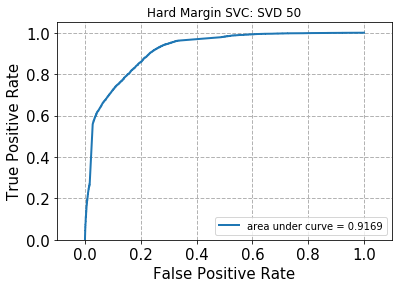

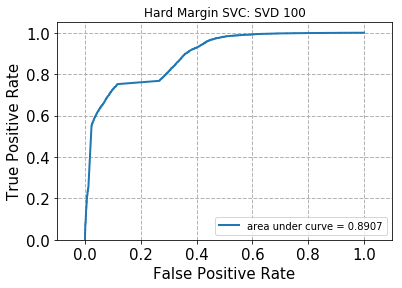

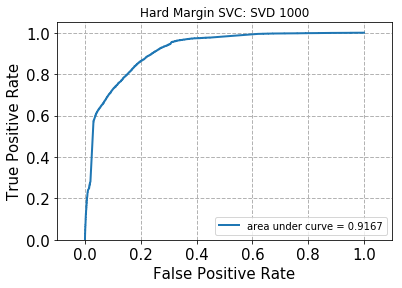

In [189]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_svd(), labels, "Hard Margin SVC: SVD 50")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_svd(100), labels, "Hard Margin SVC: SVD 100")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_svd(1000), labels, "Hard Margin SVC: SVD 1000")

(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hard Margin SVC: NMF 50
The confusion matrix is: 
[[13730   815]
 [ 3121  5670]]
The accuracy is: 
0.8313335618786425
The recall is: 
0.6449778182231828
The precision is: 
0.874325366229761
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hard Margin SVC: NMF 100
The confusion matrix is: 
[[14089   456]
 [ 3767  5024]]
The accuracy is: 
0.8190349674322934
The recall is: 
0.5714935729723581
The precision is: 
0.9167883211678832
(23336, 50)
Hard Margin SVC: NMF 1000
The confusion matrix is: 
[[13681   864]
 [ 3075  5716]]
The accuracy is: 
0.8312050051422695
The recall is: 
0.6502104424980093
The precision is: 
0.8686930091185411


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


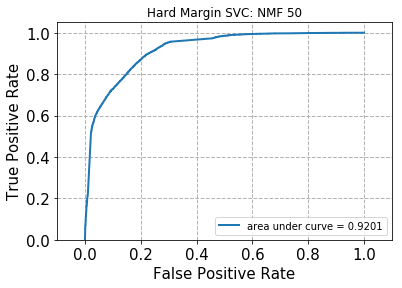

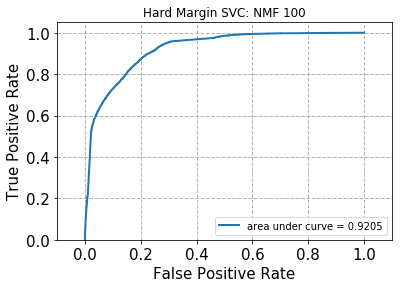

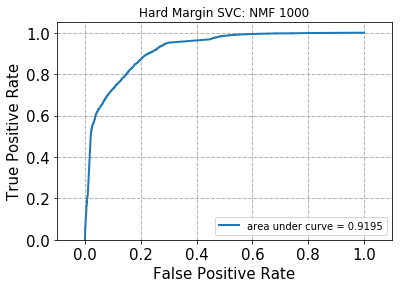

In [190]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_nmf(), labels, "Hard Margin SVC: NMF 50")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_nmf(100), labels, "Hard Margin SVC: NMF 100")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_nmf(1000), labels, "Hard Margin SVC: NMF 1000")

In [191]:
# LinearSVC Soft Margin with different NMF and SVD

(23336, 50)
Soft Margin SVC: SVD 20
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: SVD 50
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: SVD 100
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: SVD 300
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


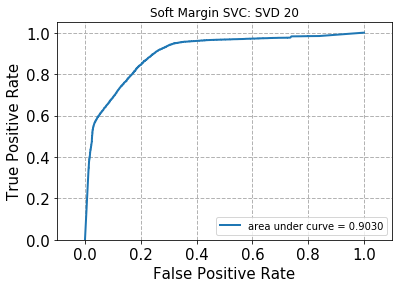

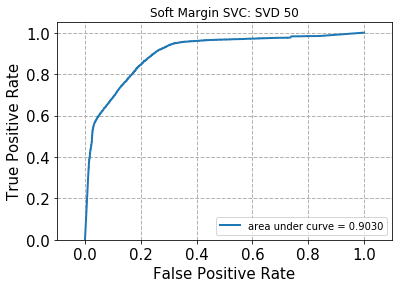

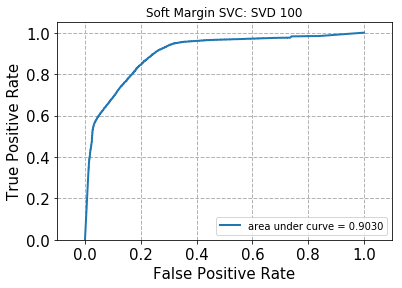

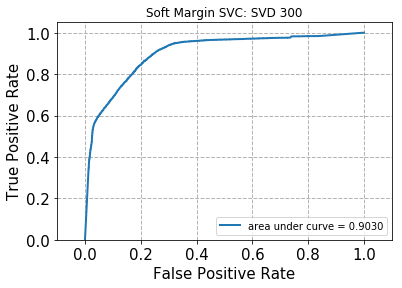

In [192]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(20), labels, "Soft Margin SVC: SVD 20")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(), labels, "Soft Margin SVC: SVD 50")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(100), labels, "Soft Margin SVC: SVD 100")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(300), labels, "Soft Margin SVC: SVD 300")

(23336, 50)
Soft Margin SVC: NMF 20
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: NMF 50
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: NMF 100
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: NMF 300
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


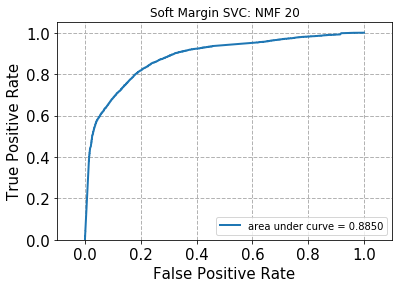

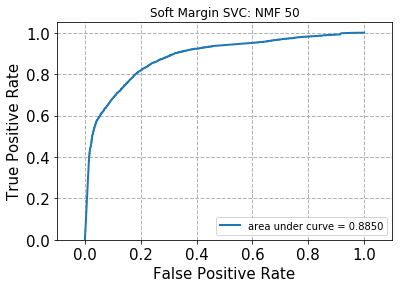

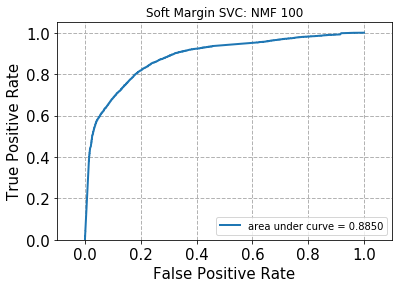

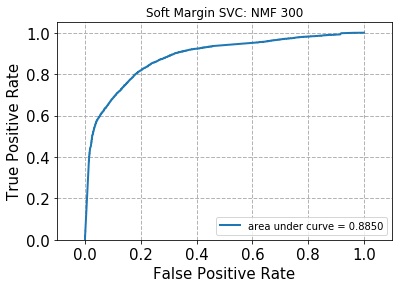

In [194]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(20), labels, "Soft Margin SVC: NMF 20")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(), labels, "Soft Margin SVC: NMF 50")


soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(100), labels, "Soft Margin SVC: NMF 100")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(300), labels, "Soft Margin SVC: NMF 300")

In [195]:
# Logistic Regression

(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: SVD 100
The confusion matrix is: 
[[13430  1115]
 [ 2596  6195]]
The accuracy is: 
0.8409753171066164
The recall is: 
0.7046979865771812
The precision is: 
0.847469220246238
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Balanced: SVD 100
The confusion matrix is: 
[[11183  3362]
 [  748  8043]]
The accuracy is: 
0.8238772711690092
The recall is: 
0.9149129791832556
The precision is: 
0.7052170100832968
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Balanced C=1: SVD 100
The confusion matrix is: 
[[11194  3351]
 [  747  8044]]
The accuracy is: 
0.8243914981145012
The recall is: 
0.9150267318848823
The precision is: 
0.7059236507240018
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression C=1: SVD 100
The confusion matrix is: 
[[13635   910]
 [ 2888  5903]]
The accuracy is: 
0.8372471717517997
The recall is: 
0.6714821977021954
The precision is: 
0.8664318215176868


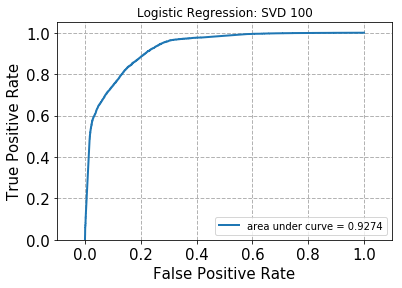

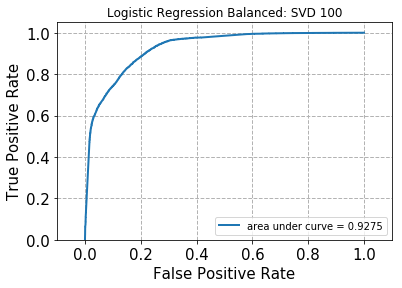

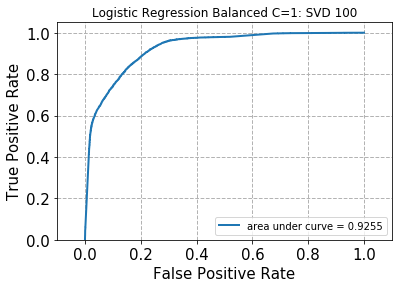

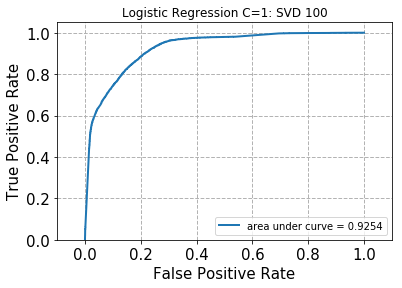

In [197]:
lr_clf = LogisticRegression(penalty='l2', C = 1e30)
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression: SVD 100", verbose = True)

lr_clf = LogisticRegression(penalty='l2', C = 1e30, class_weight='balanced')
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression Balanced: SVD 100", verbose = True)

#Best
lr_clf = LogisticRegression(penalty='l2', C = 1, class_weight='balanced')
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression Balanced C=1: SVD 100", verbose = True)

lr_clf = LogisticRegression(penalty='l2', C = 1)
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression C=1: SVD 100", verbose = True)

Gaussian Naive Bayes: SVD 50
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239
(23336, 50)
Gaussian Naive Bayes: SVD 100
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239
(23336, 50)
Gaussian Naive Bayes: SVD 300
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239


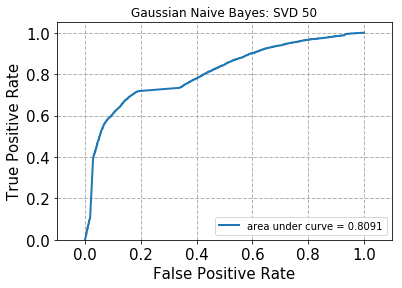

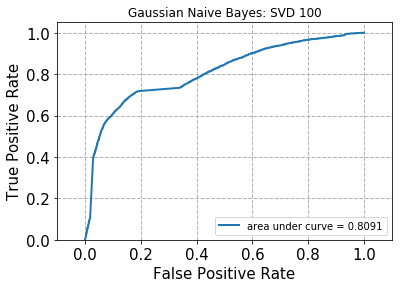

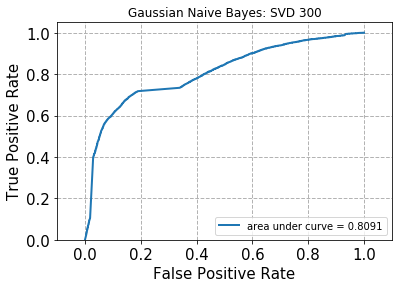

In [343]:
gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, get_svd(), labels, "Gaussian Naive Bayes: SVD 50")

gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, get_svd(100), labels, "Gaussian Naive Bayes: SVD 100")

gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, get_svd(300), labels, "Gaussian Naive Bayes: SVD 300")